# Real Estate Data

Import Necessary Libraries:

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Get Data

In [61]:
# Get data file names
rest = pd.read_csv('/Users/nikhilsharma/Desktop/Data/Datasets/Real Estate Data V21.csv')
print(rest.head())

                                      Name  \
0                         Casagrand ECR 14   
1    Ramanathan Nagar, Pozhichalur,Chennai   
2                              DAC Prapthi   
3  Naveenilaya,Chepauk, Triplicane,Chennai   
4                 VGN Spring Field Phase 1   

                                      Property Title     Price  \
0  4 BHK Flat for sale in Kanathur Reddikuppam, C...  ₹1.99 Cr   
1  10 BHK Independent House for sale in Pozhichal...  ₹2.25 Cr   
2      3 BHK Flat for sale in West Tambaram, Chennai   ₹1.0 Cr   
3  7 BHK Independent House for sale in Triplicane...  ₹3.33 Cr   
4              2 BHK Flat for sale in Avadi, Chennai   ₹48.0 L   

                                   Location  Total_Area  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai        2583          7700.0   
1     Ramanathan Nagar, Pozhichalur,Chennai        7000          3210.0   
2  Kasthuribai Nagar, West Tambaram,Chennai        1320          7580.0   
3   Naveenilaya,Chepauk, T

2. Check Data Shape

In [62]:
print(rest.shape)

(14528, 9)


3. Check Data Columns

In [63]:
print(rest.columns)

Index(['Name', 'Property Title', 'Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Description', 'Baths', 'Balcony'],
      dtype='object')


4. Remove Columns Not Needed

In [64]:
rest.drop(columns=['Description'], inplace=True)

5. Check Data Without the Columns

In [65]:
print(rest.shape)

(14528, 8)


6. Check Data Type

In [66]:
print(rest.info()) 
print(rest.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14528 non-null  object 
 1   Property Title  14528 non-null  object 
 2   Price           14528 non-null  object 
 3   Location        14528 non-null  object 
 4   Total_Area      14528 non-null  int64  
 5   Price_per_SQFT  14528 non-null  float64
 6   Baths           14528 non-null  int64  
 7   Balcony         14528 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 908.1+ KB
None
Name               object
Property Title     object
Price              object
Location           object
Total_Area          int64
Price_per_SQFT    float64
Baths               int64
Balcony            object
dtype: object


7. Convert Price Data Type to Numeric

Find Possible Variations of Non-numeric values

In [67]:
rest['Price'].str.contains("L")

##Check for possible variations
print(rest[rest['Price'].str.contains("l")])#None found

rest['Price'].str.contains("Cr")

print(rest[rest['Price'].str.contains("CR")])#None found

print(rest[rest['Price'].str.contains("cr")])#None found

print(rest[rest['Price'].str.contains("k")]) 

print(rest[rest['Price'].str.contains("K")]) #None found

Empty DataFrame
Columns: [Name, Property Title, Price, Location, Total_Area, Price_per_SQFT, Baths, Balcony]
Index: []
Empty DataFrame
Columns: [Name, Property Title, Price, Location, Total_Area, Price_per_SQFT, Baths, Balcony]
Index: []
Empty DataFrame
Columns: [Name, Property Title, Price, Location, Total_Area, Price_per_SQFT, Baths, Balcony]
Index: []
                       Name  \
14491  Wazirabad, New Delhi   

                                          Property Title   Price  \
14491  5 BHK Independent House for sale in Wazirabad,...  ₹55.0k   

                   Location  Total_Area  Price_per_SQFT  Baths Balcony  
14491  Wazirabad, New Delhi         250        220000.0      1     Yes  
Empty DataFrame
Columns: [Name, Property Title, Price, Location, Total_Area, Price_per_SQFT, Baths, Balcony]
Index: []


Use same measure for all

In [68]:
print(rest['Price'].sort_values(ascending=False))

438      ₹99.99 L
1072     ₹99.99 L
12238    ₹99.95 L
2959      ₹99.5 L
6965      ₹99.5 L
           ...   
4542      ₹1.0 Cr
13120     ₹1.0 Cr
8982      ₹1.0 Cr
11915     ₹1.0 Cr
7948         ₹1.0
Name: Price, Length: 14528, dtype: object


In [69]:
print(rest[(rest['Property Title'] == '3 BHK Flat for sale in Bommanahalli, Bangalore') & (rest['Total_Area'] == 1889)])

                                   Name  \
4757  Lake City, Bommanahalli,Bangalore   

                                      Property Title        Price  \
4757  3 BHK Flat for sale in Bommanahalli, Bangalore  ₹95.45 Lacs   

                               Location  Total_Area  Price_per_SQFT  Baths  \
4757  Lake City, Bommanahalli,Bangalore        1889          5050.0      3   

     Balcony  
4757     Yes  


Create new DataFrames to separate values and convert appropriately

In [70]:
rest2 = rest.copy()
print(rest2.columns)

# Extract rows where 'Price' contains "L"
restL = rest2[rest2['Price'].str.contains("L")]
restL['Price'] = restL['Price'].str.replace("L", "")  # Remove "L"
restL['Price'] = restL['Price'].str.replace("₹", "")  # Remove "₹" symbol
restL['Price'] = pd.to_numeric(restL['Price'], errors='coerce')  # Convert to numeric
restL['Price'] = restL['Price'] * 100000  # Multiply by 100000 to convert to actual price

# Extract rows where 'Price' contains "k"
restk = rest2[rest2['Price'].str.contains("k")]
restk['Price'] = restk['Price'].str.replace("k", "")  # Remove "k"
restk['Price'] = restk['Price'].str.replace("₹", "")  # Remove "₹" symbol
restk['Price'] = pd.to_numeric(restk['Price'], errors='coerce')  # Convert to numeric
restk['Price'] = restk['Price'] * 1000  # Multiply by 1000 to convert to actual price

# Extract rows where 'Price' contains "Cr"
restCr = rest2[rest2['Price'].str.contains("Cr")]
restCr['Price'] = restCr['Price'].str.replace("Cr", "")  # Remove "Cr"
restCr['Price'] = restCr['Price'].str.replace("₹", "")  # Remove "₹" symbol
restCr['Price'] = pd.to_numeric(restCr['Price'], errors='coerce')  # Convert to numeric
restCr['Price'] = restCr['Price'] * 10000000  # Multiply by 10000000 to convert to actual price

df = pd.concat([restL, restk, restCr], ignore_index=True)
print(df.head(5))

Index(['Name', 'Property Title', 'Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Baths', 'Balcony'],
      dtype='object')
                                           Name  \
0                      VGN Spring Field Phase 1   
1                                KG Earth Homes   
2  THIRAN FLATS ,Gowrivakkam, Sembakkam,Chennai   
3                              TK Jasmine Grove   
4                                        Avenue   

                                      Property Title      Price  \
0              2 BHK Flat for sale in Avadi, Chennai  4800000.0   
1           2 BHK Flat for sale in Siruseri, Chennai  4000000.0   
2          2 BHK Flat for sale in Sembakkam, Chennai  6000000.0   
3  3 BHK Independent House for sale in Mahindra W...  7235000.0   
4      2 BHK Flat for sale in West Tambaram, Chennai  4200000.0   

                                       Location  Total_Area  Price_per_SQFT  \
0                                Avadi, Chennai         960          5000.0

/var/folders/87/6hsfyhyd6ds1hx7t660j92j00000gn/T/ipykernel_7933/1608915487.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restL['Price'] = restL['Price'].str.replace("L", "")  # Remove "L"
/var/folders/87/6hsfyhyd6ds1hx7t660j92j00000gn/T/ipykernel_7933/1608915487.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restL['Price'] = restL['Price'].str.replace("₹", "")  # Remove "₹" symbol
/var/folders/87/6hsfyhyd6ds1hx7t660j92j00000gn/T/ipykernel_7933/1608915487.py:8: SettingWithCopyWarning: 
A value is 

8. Check for Null Values in Each Column

In [71]:
df.isna().sum()

Name              0
Property Title    0
Price             1
Location          0
Total_Area        0
Price_per_SQFT    0
Baths             0
Balcony           0
dtype: int64

9. Find the Missing Row

In [72]:
missing_rows = df[df['Price'].isna()]
print(missing_rows)

print(rest[rest['Property Title']=='3 BHK Flat for sale in Bommanahalli, Bangalore'])

                                   Name  \
3200  Lake City, Bommanahalli,Bangalore   

                                      Property Title  Price  \
3200  3 BHK Flat for sale in Bommanahalli, Bangalore    NaN   

                               Location  Total_Area  Price_per_SQFT  Baths  \
3200  Lake City, Bommanahalli,Bangalore        1889          5050.0      3   

     Balcony  
3200     Yes  
                                                   Name  \
2191                                     Mahaveer Calyx   
2277                                       Royal Legend   
2350                                   Arvind Shambhavi   
3274                                    Mahaveer Squire   
3584         Shriram Greenfield,Bommanahalli, Bangalore   
3805  prabhavathi prajwal,Seenappa Layout, Bommanaha...   
3935            Seenappa Layout, Bommanahalli,Bangalore   
4757                  Lake City, Bommanahalli,Bangalore   
4824                                Wise Wise Residency   

        

10. Find the value of the missing row in original dataset

In [73]:
print(rest[(rest['Property Title'] == '3 BHK Flat for sale in Bommanahalli, Bangalore') & (rest['Total_Area'] == 1889)])

                                   Name  \
4757  Lake City, Bommanahalli,Bangalore   

                                      Property Title        Price  \
4757  3 BHK Flat for sale in Bommanahalli, Bangalore  ₹95.45 Lacs   

                               Location  Total_Area  Price_per_SQFT  Baths  \
4757  Lake City, Bommanahalli,Bangalore        1889          5050.0      3   

     Balcony  
4757     Yes  


11. Update the missing value & Confirm

In [74]:
df['Price'].fillna(95.45 * 100000, inplace=True)
print(df[(df['Property Title'] == '3 BHK Flat for sale in Bommanahalli, Bangalore') & (df['Total_Area'] == 1889)])

                                   Name  \
3200  Lake City, Bommanahalli,Bangalore   

                                      Property Title      Price  \
3200  3 BHK Flat for sale in Bommanahalli, Bangalore  9545000.0   

                               Location  Total_Area  Price_per_SQFT  Baths  \
3200  Lake City, Bommanahalli,Bangalore        1889          5050.0      3   

     Balcony  
3200     Yes  


In [75]:
print(df.dtypes)

Name               object
Property Title     object
Price             float64
Location           object
Total_Area          int64
Price_per_SQFT    float64
Baths               int64
Balcony            object
dtype: object


12. Number of Property Titles

In [76]:
df['Property Title'].value_counts()

2 BHK Flat for sale in Electronic City, Bangalore             53
2 BHK Flat for sale in Hadapsar, Pune                         39
1 BHK Flat for sale in Mira Road East, Mumbai                 38
2 BHK Flat for sale in Mira Road East, Mumbai                 33
2 BHK Flat for sale in Wagholi, Pune                          31
                                                              ..
1 BHK Flat for sale in Devadi, Pune                            1
1 RK Independent House for sale in Parvati Darshan, Pune       1
1 BHK Flat for sale in Sonapur, Pune                           1
2 BHK Flat for sale in Yavat, Pune                             1
8 BHK Independent House for sale in Chhattarpur, New Delhi     1
Name: Property Title, Length: 6505, dtype: int64

13. Number of Locations

In [77]:
df['Location'].value_counts()

Sector 12 Dwarka, New Delhi                                44
Wagholi, Pune                                              39
Bannerughatta, Bangalore                                   35
Chakan, Pune                                               32
Horamavu Agara, Horamavu,Bangalore                         32
                                                           ..
Mandirtala, Kolkata                                         1
Sree Durga Pally, Paschim Barisha,Kolkata                   1
r n das road,Tanu Pukur, Dhakuria,Kolkata                   1
Airport Gate no. 1, International Airport,Kolkata           1
Block an poorvi Shalimar bagh ,Shalimar Bagh, New Delhi     1
Name: Location, Length: 7049, dtype: int64

14. Create a City column

In [78]:
df['City'] = df['Location'].apply(lambda x: x.split(",")[-1].strip())
print(df.columns)

Index(['Name', 'Property Title', 'Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Baths', 'Balcony', 'City'],
      dtype='object')


15. Min & Max of Price & Price per Sq.Ft. by Location

In [79]:
round(df.groupby('Location')[['Price','Price_per_SQFT']].agg(['min','max']),2)

Price              \
                                                           min         max   
Location                                                                     
    Madhurangan Apartment ,Ambegaon, Pune            2300000.0   2300000.0   
   Manganahalli    Sriram Layout ,Ullal Uppanag...   9000000.0   9000000.0   
   sona Building,Bhayandar West, Mumbai              1800000.0   1800000.0   
  Sec 2 Pooja apartment Bhosari ,Indrayani Naga...   6500000.0   6500000.0   
 A N SWAGATH,Gubbalala, Subramanyapura,Bangalore     4490000.0   4490000.0   
...                                                        ...         ...   
west hills,Suriyammapet, Saidapet,Chennai           11500000.0  11500000.0   
wind apartment ,New Ballygunge, Kasba,Kolkata        8500000.0   8500000.0   
yadari,Devasthanagalu, Varthur,Bangalore             5000000.0   5000000.0   
yamuna sadan,Vishwakarma Colony, Pul Prahlad Pu...   4950000.0   4950000.0   
yesh homes,Nemilichery, Chromepet,Chennai            2800000.0   2800000.0   

                                                   Price_per_SQFT           
                                                              min      max  
Location                                                                    
    Madhurangan Apartment ,Ambegaon, Pune                  3960.0   3960.0  
   Manganahalli    Sriram Layout ,Ullal Uppanag...         7500.0   7500.0  
   sona Building,Bhayandar West, Mumbai                    7200.0   7200.0  
  Sec 2 Pooja apartment Bhosari ,Indrayani Naga...         5910.0   5910.0  
 A N SWAGATH,Gubbalala, Subramanyapura,Bangalore           4320.0   4320.0  
...                                                           ...      ...  
west hills,Suriyammapet, Saidapet,Chennai                 10690.0  10690.0  
wind apartment ,New Ballygunge, Kasba,Kolkata              7390.0   7390.0  
yadari,Devasthanagalu, Varthur,Bangalore                   1190.0   1190.0  
yamuna sadan,Vishwakarma Colony, Pul Prahlad Pu...         1570.0   1570.0  
yesh homes,Nemilichery, Chromepet,Chennai                  5040.0   5040.0  

[7049 rows x 4 columns]

16. Min & Max of Price & Price per Sq.Ft. by City

In [80]:
round(df.groupby('City')[['Price','Price_per_SQFT']].agg(['min','max']),2)

Price              Price_per_SQFT          
                 min          max            min       max
City                                                      
Bangalore   100000.0  840000000.0         1000.0  986000.0
Chennai     500000.0  160000000.0         1000.0  819000.0
Hyderabad  1921000.0  215000000.0         1750.0  750000.0
Kolkata     500000.0  120000000.0         1000.0  902000.0
Mumbai      111000.0  300000000.0         1070.0  937000.0
New Delhi    55000.0  650000000.0         1000.0  974000.0
Pune        100000.0  402000000.0         1020.0  999000.0
Thane      4950000.0    7850000.0         7730.0   11540.0

17. Mean Price by City Sorted Descending

In [81]:
df1 = df.groupby(['City'])['Price'].mean().sort_values(ascending=False)

print(df1)

City
Mumbai       1.474298e+07
New Delhi    1.322429e+07
Hyderabad    1.245731e+07
Bangalore    1.216826e+07
Chennai      9.541808e+06
Pune         6.800844e+06
Kolkata      6.791981e+06
Thane        6.133333e+06
Name: Price, dtype: float64


18. No. of Properties with and without Balcony

In [82]:
df['Balcony'].value_counts()

Yes    8577
No     5948
Name: Balcony, dtype: int64

19. Check the Price Quantiles

In [83]:
np.quantile(df['Price'], [0.25, 0.5, 0.75])

array([ 3700000.,  6500000., 11400000.])

20. Find Outliers

In [84]:
iqr = df['Price'].quantile(0.75) - df['Price'].quantile(0.25)

lt = df['Price'].quantile(0.25) - 1.5 * iqr
ut = df['Price'].quantile(0.75) + 1.5 * iqr

print(lt, ut)

outliers = df[(df['Price'] < lt) | (df['Price'] > ut)]
print(outliers)

-7849999.999999996 22949999.999999993
                                                    Name  \
10299            Naveenilaya,Chepauk, Triplicane,Chennai   
10301           Ramakrishna Puram, West Mambalam,Chennai   
10303                                   Ramcons Dominion   
10304                                         VGN Coasta   
10308          Swarnambigai Nagar, Virugambakkam,Chennai   
...                                                  ...   
14515                                Mehrauli, New Delhi   
14517                   Ghonda Patti, Shahdara,New Delhi   
14519       Old Rajinder Nagar, Rajinder Nagar,New Delhi   
14521                                 RWA Azadpur Colony   
14523  Chhattarpur Enclave Phase1, Chhattarpur,New Delhi   

                                          Property Title       Price  \
10299  7 BHK Independent House for sale in Triplicane...  33300000.0   
10301     6 BHK Villa for sale in West Mambalam, Chennai  85000000.0   
10303       3 BHK Flat fo

In [85]:
df.columns

Index(['Name', 'Property Title', 'Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Baths', 'Balcony', 'City'],
      dtype='object')

21. Count by City

In [86]:
df['City'].value_counts()

Bangalore    4511
Pune         2964
New Delhi    2165
Chennai      1595
Kolkata      1392
Mumbai       1352
Hyderabad     540
Thane           6
Name: City, dtype: int64

20. Visualize Data

a. Bar Plot - Mean Price by City

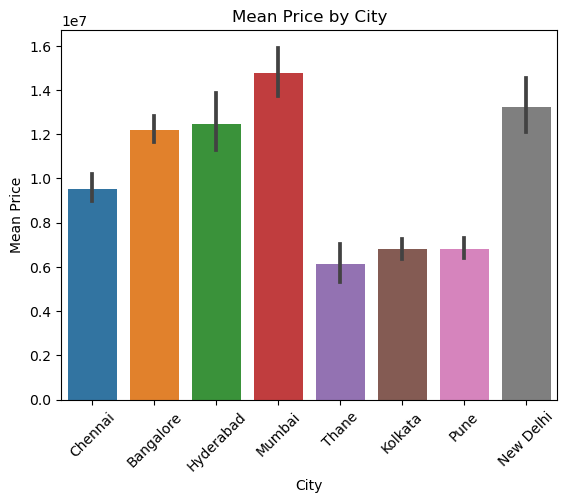

In [87]:
sns.barplot(data=df, x='City', y='Price')
plt.xticks(rotation=45) 
plt.xlabel('City')
plt.ylabel('Mean Price')
plt.title('Mean Price by City')
plt.show()

Point Plot - Mean Price by City

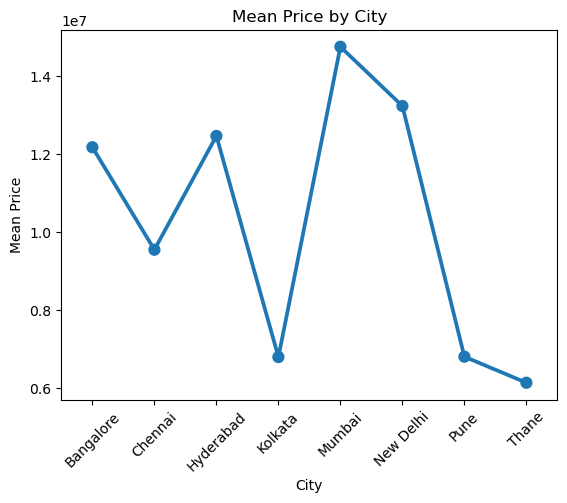

In [88]:
# Calculate mean price per city
mean_price_per_city = df.groupby('City')['Price'].mean().reset_index()

# Plotting
sns.pointplot(data=mean_price_per_city, x='City', y='Price')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Mean Price')
plt.title('Mean Price by City')
plt.show()

b. Box Plot - City & Total Area

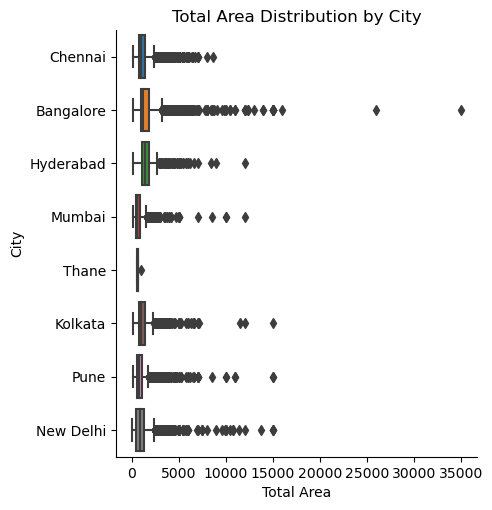

In [89]:
sns.catplot(data=df, x='Total_Area', y='City', kind='box')
plt.xlabel('Total Area')
plt.ylabel('City')
plt.title('Total Area Distribution by City')
plt.show()

In [90]:
df.columns

Index(['Name', 'Property Title', 'Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Baths', 'Balcony', 'City'],
      dtype='object')

c. Scatter Plot - Total Area & Price

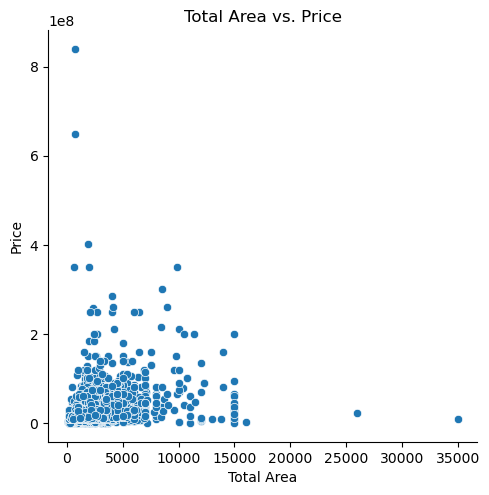

In [91]:
sns.relplot(data=df, x='Total_Area', y='Price', kind='scatter')
plt.xlabel('Total Area')
plt.ylabel('Price')
plt.title('Total Area vs. Price')
plt.show()

d. Count Plot - City

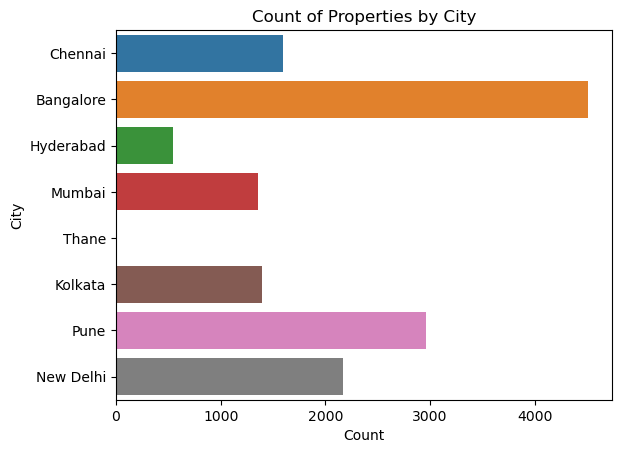

In [92]:
sns.countplot(data=df, y='City')
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count of Properties by City')
plt.show()

e. Count Plot - Baths

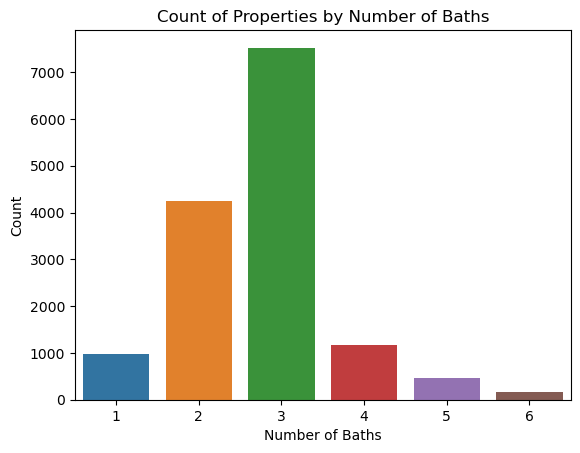

In [93]:
sns.countplot(data=df, x='Baths')
plt.xlabel('Number of Baths')
plt.ylabel('Count')
plt.title('Count of Properties by Number of Baths')
plt.show()

f. Count Plot - Balcony

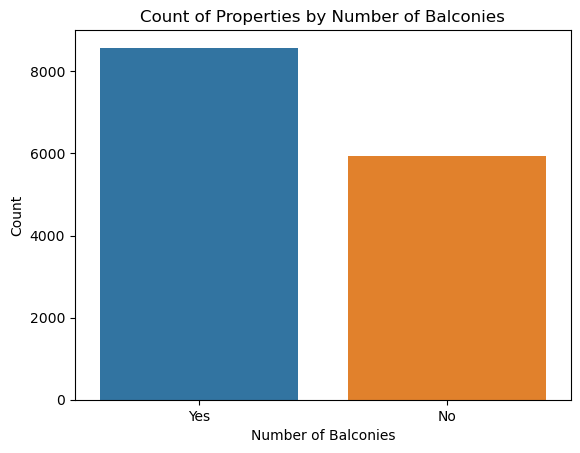

In [94]:
sns.countplot(data=df, x='Balcony')
plt.xlabel('Number of Balconies')
plt.ylabel('Count')
plt.title('Count of Properties by Number of Balconies')
plt.show()

g. Balcony Count by City

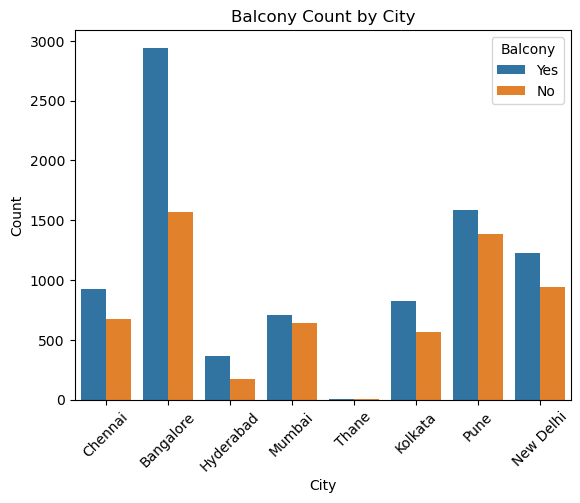

In [95]:
sns.countplot(data=df, x='City', hue='Balcony')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Balcony Count by City')
plt.legend(title='Balcony')
plt.show()

h. Box Plot - City & Price

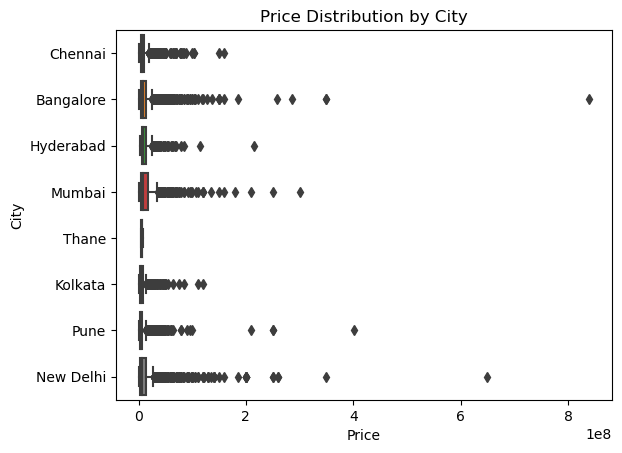

In [96]:
sns.boxplot(data=df, y='City', x='Price')
plt.xlabel('Price')
plt.ylabel('City')
plt.title('Price Distribution by City')
plt.show()

i. Price & Total Area by City

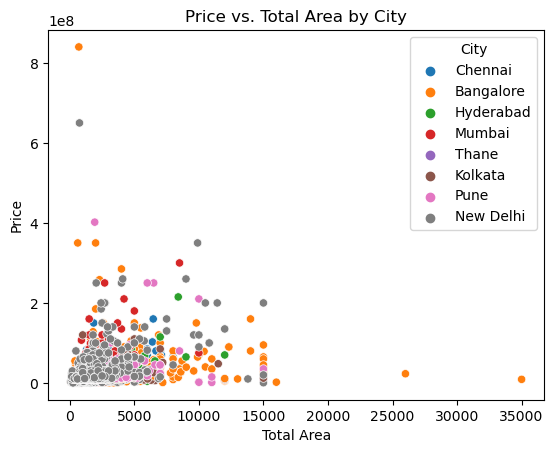

In [97]:
sns.scatterplot(data=df, x='Total_Area', y='Price', hue='City')
plt.xlabel('Total Area')
plt.ylabel('Price')
plt.title('Price vs. Total Area by City')
plt.legend(title='City')
plt.show()

j. Violin Plot - Price Distribution by City

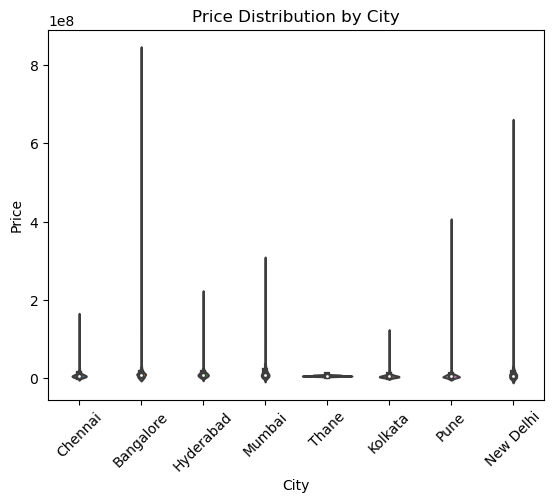

In [98]:
sns.violinplot(data=df, x='City', y='Price')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Price Distribution by City')
plt.show()

k. Bath Count by City

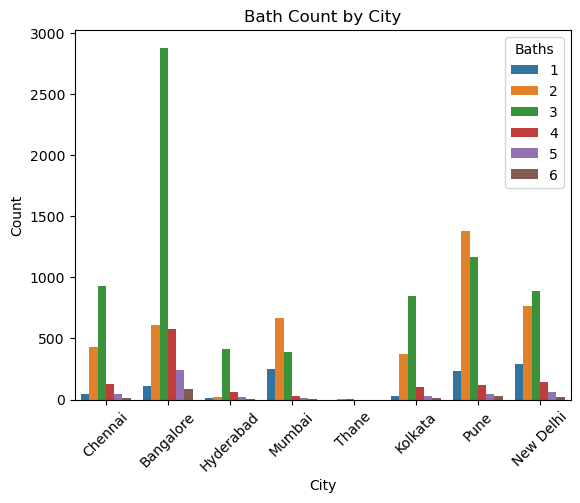

In [99]:
sns.countplot(data=df, x='City', hue='Baths')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Bath Count by City')
plt.legend(title='Baths')
plt.show()

l. Mean Price & Total Area by City

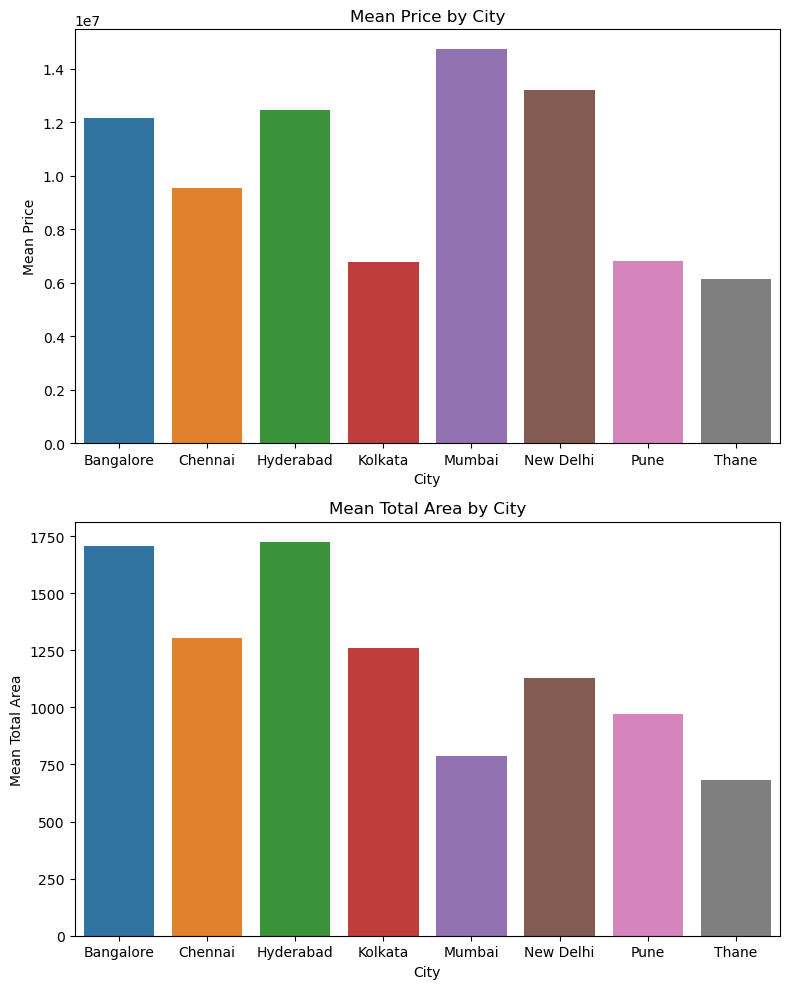

In [100]:
mean_price_by_city = df.groupby('City')['Price'].mean().reset_index()
mean_area_by_city = df.groupby('City')['Total_Area'].mean().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.barplot(data=mean_price_by_city, x='City', y='Price', ax=axes[0])
axes[0].set_xlabel('City')
axes[0].set_ylabel('Mean Price')
axes[0].set_title('Mean Price by City')

sns.barplot(data=mean_area_by_city, x='City', y='Total_Area', ax=axes[1])
axes[1].set_xlabel('City')
axes[1].set_ylabel('Mean Total Area')
axes[1].set_title('Mean Total Area by City')

plt.tight_layout()
plt.show()

m. Total Area vs Baths by City

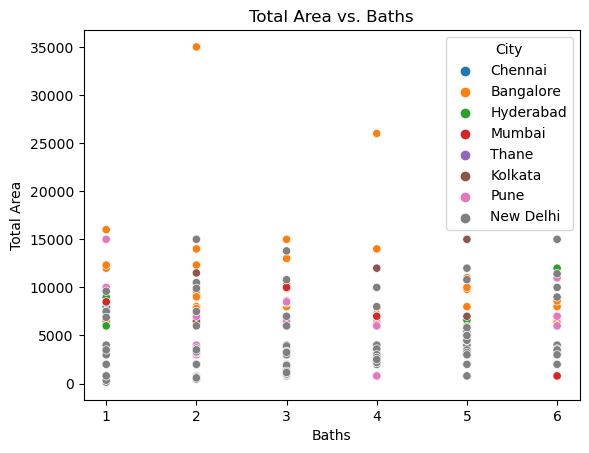

In [101]:
sns.scatterplot(data=df, x='Baths', y='Total_Area', hue='City')
plt.xlabel('Baths')
plt.ylabel('Total Area')
plt.title('Total Area vs. Baths')
plt.legend(title='City')
plt.show()

n. Total Area vs Balcony by City

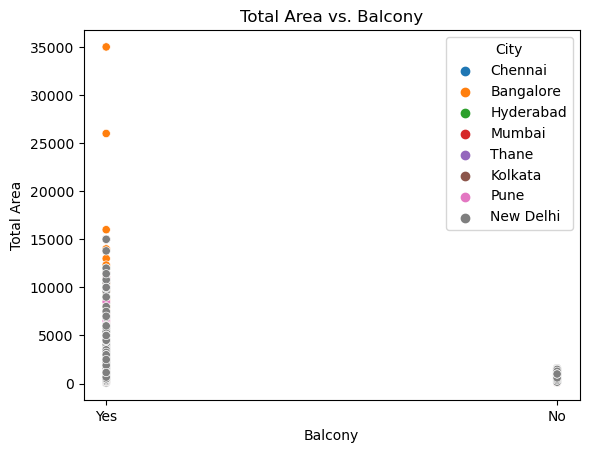

In [102]:
sns.scatterplot(data=df, x='Balcony', y='Total_Area', hue='City')
plt.xlabel('Balcony')
plt.ylabel('Total Area')
plt.title('Total Area vs. Balcony')
plt.show()

o. Histograms - Log Price & Log Total Area

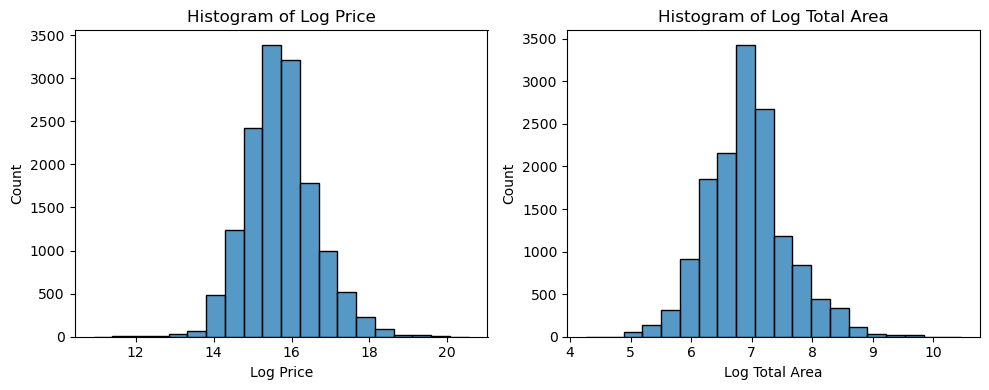

In [103]:
# Apply logarithmic transformation to 'Price' and 'Total_Area'
df['Log_Price'] = np.log1p(df['Price'])
df['Log_Total_Area'] = np.log1p(df['Total_Area'])

# Create revised histograms
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Log_Price', bins=20)
plt.xlabel('Log Price')
plt.ylabel('Count')
plt.title('Histogram of Log Price')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Log_Total_Area', bins=20)
plt.xlabel('Log Total Area')
plt.ylabel('Count')
plt.title('Histogram of Log Total Area')

plt.tight_layout()
plt.show()

p. Distribution of Properties by City

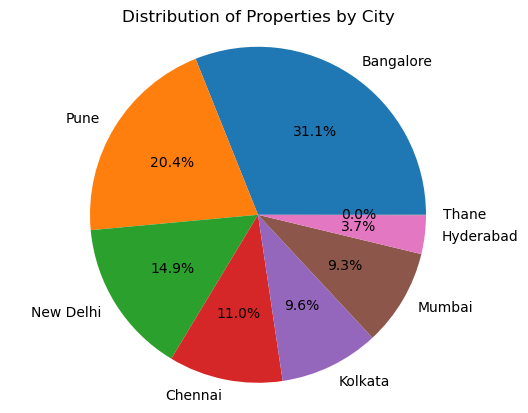

In [104]:
city_counts = df['City'].value_counts()

# Pie chart
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Properties by City')

# Aspect ratio to make the pie chart a circle
plt.axis('equal')

# Display the chart
plt.show()